# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Data Load

In [3]:
df_penyakit = pd.read_excel('/content/Tugas 3 STDA4101-2024.1 (1).xlsx')
print(df_penyakit)

    AGE   BMI      BP   S1    Y  Unnamed: 5  \
0    59  32.1  101.00  157  151         NaN   
1    48  21.6   87.00  183   75         NaN   
2    72  30.5   93.00  156  141         NaN   
3    24  25.3   84.00  198  206         NaN   
4    50  23.0  101.00  192  135         NaN   
..  ...   ...     ...  ...  ...         ...   
95   29  21.0   71.00  156  162         NaN   
96   64  27.3  109.00  186  150         NaN   
97   41  34.6   87.33  205  279         NaN   
98   49  25.9   91.00  178   92         NaN   
99   48  20.4   98.00  209   83         NaN   

                                           Unnamed: 6  
0                                         Keterangan:  
1   Y, ukuran kuantitatif perkembangan penyakit se...  
2                                   AGE, age in years  
3                                BMI, body mass index  
4                          BP, average blood pressure  
..                                                ...  
95                                         

**Keterangan:**
* Y : Ukuran kuantitatif perkembangan penyakit setelah satu tahun amatan
* AGE : Age in Years
* BMI : Body Mass Index (indeks massa tubuh)
* BP : Average Blood Pressure (Rata rata tekanan darah)
* S1 : Total serum cholesterol (Kolesterol serum total)

In [5]:
# mengambil kolom tertentu untuk analisis
df = df_penyakit[['AGE', 'BMI', 'BP', 'S1', 'Y']].dropna()
print(df)

    AGE   BMI      BP   S1    Y
0    59  32.1  101.00  157  151
1    48  21.6   87.00  183   75
2    72  30.5   93.00  156  141
3    24  25.3   84.00  198  206
4    50  23.0  101.00  192  135
..  ...   ...     ...  ...  ...
95   29  21.0   71.00  156  162
96   64  27.3  109.00  186  150
97   41  34.6   87.33  205  279
98   49  25.9   91.00  178   92
99   48  20.4   98.00  209   83

[100 rows x 5 columns]


# Data Wrangling

In [6]:
#mengecek tipe datanya terlebih dahulu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     100 non-null    int64  
 1   BMI     100 non-null    float64
 2   BP      100 non-null    float64
 3   S1      100 non-null    int64  
 4   Y       100 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 4.0 KB


In [8]:
# Mengecek duplikasi
df.duplicated().sum()

0

In [10]:
# Mengecek missing values
df.isna().sum()

,0
AGE,0
BMI,0
BP,0
S1,0
Y,0


# EDA

In [11]:
#statistik deskriptif
df.describe()

,AGE,BMI,BP,S1,Y
count,100.000000,100.000000,100.00000,100.000000,100.00000
mean,45.820000,25.398000,91.36660,180.910000,133.56000
std,13.688733,3.832476,13.31877,31.790061,69.17031
min,19.000000,18.600000,63.00000,97.000000,37.00000
25%,35.000000,22.850000,83.00000,158.000000,75.00000
50%,47.500000,24.950000,89.33500,181.500000,128.50000
75%,58.000000,27.500000,98.00000,198.000000,170.00000
max,72.000000,38.000000,131.00000,264.000000,341.00000




*  Kolom AGE:berkisar antara 19 hingga 72 tahun, dengan rata-rata 45.82 tahun
*  Kolom BMI: Indeks massa tubuh antara 18.6 hingga 38, rata-rata 25.40.
*  Kolom BP: Tekanan darah rata-rata 91.37, dengan rentang dari 63 hingga 131.
*  Kolom S1: Serum kolesterol total antara 97 hingga 264, dengan rata-rata 180.91.
*  Dan kolom Y: Ukuran perkembangan penyakit berkisaran 37 hingga 341, rata-rata 133.56.


In [14]:
# Korelasi antara variabel numerik
df.corr()


,AGE,BMI,BP,S1,Y
AGE,1.000000,0.291499,0.319403,0.353294,0.142536
BMI,0.291499,1.000000,0.347581,0.233441,0.496646
BP,0.319403,0.347581,1.000000,0.360052,0.290501
S1,0.353294,0.233441,0.360052,1.000000,0.075864
Y,0.142536,0.496646,0.290501,0.075864,1.000000


# Jawaban Tugas 3

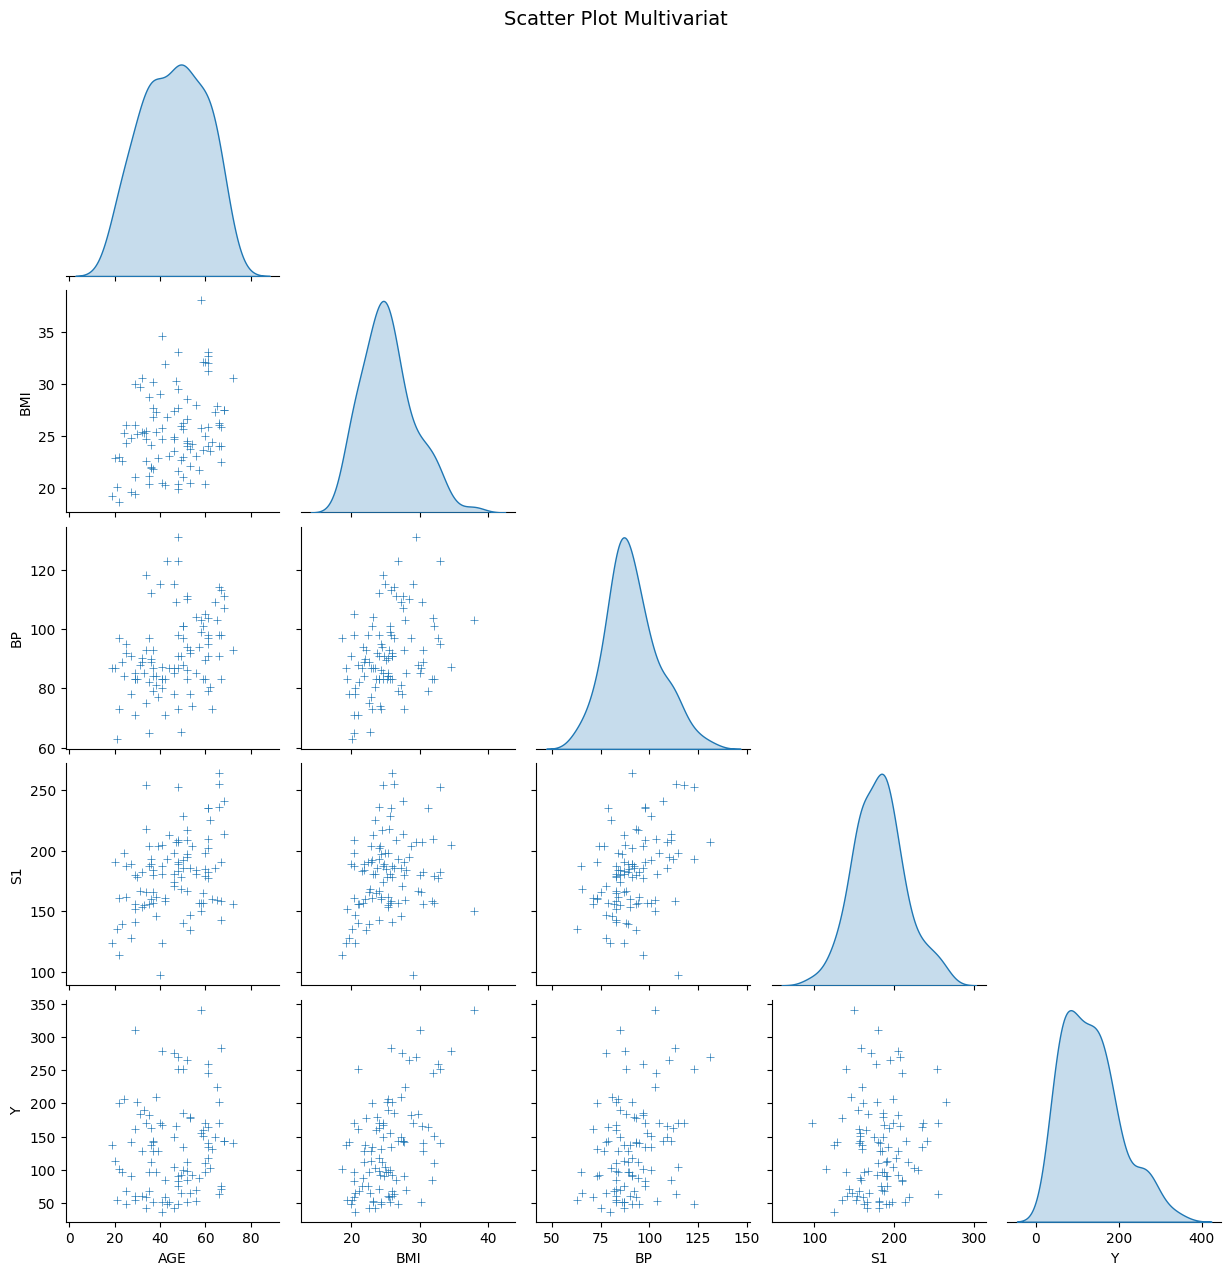

In [15]:
# Soal 1.Membuat visualisasi data multivariat dengan menggunakan scatter plot untuk mengetahui hubungan antar variabel
sns.pairplot(df, diag_kind='kde', markers ='+', corner = True)
plt.suptitle("Scatter Plot Multivariat", y=1.02, fontsize=14)
plt.show()


* Kita memodelkan hubungan variabel dependen Y (ukuran perkembangan penyakit) dengan variabel independen AGE, BMI, BP, dan S1

In [16]:
#Soal 2.Tentukan model persamaan regresi linear
X = df[['AGE', 'BMI', 'BP', 'S1']]
y = df['Y']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     8.768
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           4.55e-06
Time:                        01:28:12   Log-Likelihood:                -549.34
No. Observations:                 100   AIC:                             1109.
Df Residuals:                      95   BIC:                             1122.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -119.8912     53.293     -2.250      0.0

In [ ]:
#Soal 3.Berikan ulasan Anda tentang model tersebut.




1.   Kualitas model R-squared = 0.270  ini hanya menjelaskan 27% variabilitas variabel dependen Y. Ini menunjukkan bahwa sebagian besar variabilitas perkembangan penyakit tidak dapat dijelaskan oleh variabel independen dalam model ini,F-statistic = 8.768 dimana model secara keseluruhan signifikan, yang berarti setidaknya satu variabel independen memiliki hubungan yang signifikan dengan Y.


---



2.   Durbin-Watson = 1.986: Nilai ini mendekati 2, menunjukkan bahwa tidak ada autokorelasi dalam residual, yang baik untuk model regresi.
Omnibus dan Jarque-Bera = P-value > 0.05 menunjukkan bahwa residual berdistribusi normal, sehingga asumsi regresi terpenuhi.

---



3.   Signifikansi koefisien individual

* const	=-119.89 ;nilai perkembangan penyakit tanpa pengaruh variabel lain
* AGE	=-0.0748 Tidak signifikan (p > 0.05). Usia tidak memiliki hubungan yang berarti dengan perkembangan penyakit dalam model ini.
* BMI	=8.3701	Sangat signifikan (p < 0.01). BMI memiliki hubungan positif, artinya peningkatan 1 unit BMI meningkatkan Y sebesar 8.37 unit.
* BP	=0.8582 Tidak signifikan (p > 0.05). Tekanan darah memiliki kontribusi kecil yang tidak signifikan.
* S1  =-0.1886 Tidak signifikan (p > 0.05). Serum kolesterol tidak menunjukkan hubungan yang berarti.

---

4. Masalah Multikolinearitas (Condition Number) = 1.87e+03 (1,870): Angka ini cukup besar, menunjukkan kemungkinan adanya multikolinearitas antara variabel independen. Hal ini dapat memengaruhi stabilitas estimasi koefisien.










# Insight

**Kesimpulan**

Dari keempat variabel independen, hanya BMI yang signifikan secara statistik dalam menjelaskan perkembangan penyakit (Y). Variabel lainnya mungkin tidak terlalu relevan,dengan kemampuan model regresi ini dalam menjelaskan varibel dependen Y (ukuran perkembangan penyakit) masih terbatas....Sekian